In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('final_bookings_cleaned.csv')
df_delhi = df[df['city'] == 'Delhi']


In [3]:
df_delhi[['revenue_generated', 'revenue_realized']].sum()
df_delhi['revenue_loss'] = df_delhi['revenue_generated'] - df_delhi['revenue_realized']
revenue_loss_pct = df_delhi['revenue_loss'].sum() / df_delhi['revenue_generated'].sum() * 100
print(f"Delhi Revenue Loss %: {revenue_loss_pct:.2f}%")
df_delhi

Delhi Revenue Loss %: 14.93%


C:\Users\user\AppData\Local\Temp\ipykernel_16020\2150344043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delhi['revenue_loss'] = df_delhi['revenue_generated'] - df_delhi['revenue_realized']


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,room_type,mmm yy,week no,day_type,revenue_loss
0,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,Standard,May 22,W 19,weekend,0
1,May012216558RT28,16558,2022-05-01,2022-05-01,2022-05-02,2,RT2,others,NaN,Checked Out,12600,12600,Atliq Grands,Luxury,Delhi,Elite,May 22,W 19,weekend,0
7,May012216560RT11,16560,2022-05-01,2022-05-01,2022-05-03,1,RT1,direct offline,NaN,Checked Out,9100,9100,Atliq City,Business,Delhi,Standard,May 22,W 19,weekend,0
8,May012216560RT14,16560,2022-05-01,2022-05-01,2022-05-04,1,RT1,logtrip,1.0,Checked Out,9100,9100,Atliq City,Business,Delhi,Standard,May 22,W 19,weekend,0
9,May012216560RT15,16560,2022-05-01,2022-05-01,2022-05-03,2,RT1,makeyourtrip,NaN,Checked Out,9100,9100,Atliq City,Business,Delhi,Standard,May 22,W 19,weekend,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127609,Jul312216563RT49,16563,2022-07-31,2022-07-31,2022-08-04,1,RT4,others,NaN,Checked Out,26600,26600,Atliq Palace,Business,Delhi,Presidential,Jul 22,W 32,weekend,0
127610,Jul312216563RT410,16563,2022-07-31,2022-07-31,2022-08-04,1,RT4,makeyourtrip,NaN,Cancelled,26600,10640,Atliq Palace,Business,Delhi,Presidential,Jul 22,W 32,weekend,15960
127611,Jul312216563RT411,16563,2022-07-31,2022-07-31,2022-08-02,1,RT4,others,3.0,Checked Out,26600,26600,Atliq Palace,Business,Delhi,Presidential,Jul 22,W 32,weekend,0
127612,Jul312216563RT412,16563,2022-07-31,2022-07-31,2022-08-01,1,RT4,logtrip,5.0,Checked Out,26600,26600,Atliq Palace,Business,Delhi,Presidential,Jul 22,W 32,weekend,0


In [4]:
room_summary = df_delhi.groupby('room_category')[['revenue_generated', 'revenue_realized']].sum()

room_summary['revenue_loss'] = room_summary['revenue_generated'] - room_summary['revenue_realized']
room_summary['revenue_loss_%'] = (room_summary['revenue_loss'] / room_summary['revenue_generated']) * 100
room_summary


,revenue_generated,revenue_realized,revenue_loss,revenue_loss_%
room_category,,,,
RT1,71801730,61008402,10793328,15.032128
RT2,110266380,93924684,16341696,14.820198
RT3,82136880,69819120,12317760,14.996625
RT4,68332740,58147068,10185672,14.905991


In [5]:
# Step 2: Group by property_id and calculate total revenue loss
property_loss = df_delhi.groupby('property_id')[['revenue_generated', 'revenue_realized']].sum()

# Step 3: Calculate revenue loss and sort
property_loss['revenue_loss'] = property_loss['revenue_generated'] - property_loss['revenue_realized']

max_loss_property = property_loss.sort_values('revenue_loss', ascending=False)
max_loss_property['revenue loss %']= max_loss_property['revenue_loss']/max_loss_property['revenue_generated']*100
max_loss_property


,revenue_generated,revenue_realized,revenue_loss,revenue loss %
property_id,,,,
16563,102291630,86647596,15644034,15.293562
16561,64941660,54957588,9984072,15.373909
16562,62781880,53613910,9167970,14.602892
16560,62580980,53594324,8986656,14.360044
16558,39941580,34085856,5855724,14.660722


Atliq Blu- Maximum loss %
Atliq Palace - 2nd maximum loss %

In [6]:
df_delhi['is_cancelled'] = df_delhi['booking_status'].str.lower() == 'cancelled'

# Step 3: Group by property and calculate total & cancelled bookings
cancel_stats = df_delhi.groupby('property_id').agg(
    total_bookings = ('booking_id', 'count'),
    cancelled_bookings = ('is_cancelled', 'sum')
)

# Step 4: Calculate % cancellations
cancel_stats['cancellation_rate_%'] = (cancel_stats['cancelled_bookings'] / cancel_stats['total_bookings']) * 100

# Step 5: View top 5 properties with highest cancellation %
cancel_stats.sort_values('cancellation_rate_%', ascending=False).head(5)


C:\Users\user\AppData\Local\Temp\ipykernel_16020\509193799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delhi['is_cancelled'] = df_delhi['booking_status'].str.lower() == 'cancelled'


,total_bookings,cancelled_bookings,cancellation_rate_%
property_id,,,
16563,6956,1761,25.316274
16561,4185,1058,25.280765
16558,2977,746,25.058784
16562,4571,1134,24.808576
16560,4579,1105,24.131907


Cancellation rate maximum: Atliq Palace
2nd Maximum:Atliq Blue

Need to investigate cancellation policies


Now we'll investigate these metrics for Atliq Blue and Atliq Palace to find out root cause

In [7]:
df_delhi.groupby('booking_platform')[['revenue_generated', 'revenue_realized','revenue_loss']].sum().sort_values(by='revenue_loss')


,revenue_generated,revenue_realized,revenue_loss
booking_platform,,,
direct offline,16585800,14226744,2359056
journey,20023430,16871288,3152142
tripster,24532410,20749764,3782646
direct online,32817120,27853224,4963896
logtrip,36256010,31230962,5025048
makeyourtrip,66951780,56997528,9954252
others,135371180,114969764,20401416


1. ‘Others’ Has the Highest Absolute Loss (₹20.4M)
This is a huge chunk and should be investigated: which OTAs or corporate portals are bundled into "others"?

2. ‘makeyourtrip’ Has the Second Highest Loss (₹9.96M)
A big OTA, likely offering deep discounts or has high commission structure.

3. All Platforms Have Similar Loss % (~13.9%–15.7%)
This suggests a consistent pattern across platforms, but the volume-driven platforms are causing more total revenue leakage.

In [8]:
palace_df = df_delhi[df_delhi['property_id'] == 16563]
blue_df = df_delhi[df_delhi['property_id'] == 16561]


In [9]:
# For Palace
palace_room_loss = palace_df.groupby('room_category')[['revenue_generated', 'revenue_realized']].sum()
palace_room_loss['revenue_loss'] = palace_room_loss['revenue_generated'] - palace_room_loss['revenue_realized']
palace_room_loss['revenue_loss_%'] = (palace_room_loss['revenue_loss'] / palace_room_loss['revenue_generated']) * 100

# For Blue
blue_room_loss = blue_df.groupby('room_category')[['revenue_generated', 'revenue_realized']].sum()
blue_room_loss['revenue_loss'] = blue_room_loss['revenue_generated'] - blue_room_loss['revenue_realized']
blue_room_loss['revenue_loss_%'] = (blue_room_loss['revenue_loss'] / blue_room_loss['revenue_generated']) * 100
palace_room_loss


,revenue_generated,revenue_realized,revenue_loss,revenue_loss_%
room_category,,,,
RT1,22805510,19342232,3463278,15.186146
RT2,29218140,24874920,4343220,14.864807
RT3,20808480,17727024,3081456,14.808655
RT4,29459500,24703420,4756080,16.144470


In [10]:
# Example for Atliq Blue
blue_df.groupby(['room_category', 'booking_platform'])[['revenue_generated', 'revenue_realized']].sum()#.sort_values(by='revenue_loss')


revenue_generated  revenue_realized
room_category booking_platform                                     
RT1           direct offline               373100            307034
              direct online               1035580            855400
              journey                      506870            429884
              logtrip                     1094730            976248
              makeyourtrip                2083900           1765036
              others                      4144140           3580668
              tripster                     667940            561470
RT2           direct offline               916020            792792
              direct online               1794240           1494108
              journey                      963900            862596
              logtrip                     1998360           1778364
              makeyourtrip                3819060           3234672
              others                      6987960           5871348
              tripster                    1132740            966420
RT3           direct offline              1206240           1004640
              direct online               2024400           1781472
              journey                     1486800           1267056
              logtrip                     2365440           2048928
              makeyourtrip                4080720           3536400
              others                      8611680           7195440
              tripster                    1666560           1365168
RT4           direct offline              1079960            893228
              direct online               1266160           1104964
              journey                      774060            576156
              logtrip                     1534820           1223600
              makeyourtrip                3383520           2805768
              others                      6599460           5546100
              tripster                    1343300           1132628

In [11]:
month_loss = df_delhi.groupby('mmm yy')[['revenue_generated', 'revenue_realized']].sum()
month_loss['revenue_loss'] = month_loss['revenue_generated'] - month_loss['revenue_realized']
month_loss['revenue_loss_%'] = (month_loss['revenue_loss'] / month_loss['revenue_generated']) * 100
month_loss.sort_values('mmm yy', inplace=True)  # chronological order
month_loss


,revenue_generated,revenue_realized,revenue_loss,revenue_loss_%
mmm yy,,,,
Jul 22,102348540,87395238,14953302,14.610176
Jun 22,115059910,97633438,17426472,15.145564
May 22,115129280,97870598,17258682,14.990697


<Axes: title={'center': 'Monthly Revenue Loss %'}, xlabel='mmm yy'>

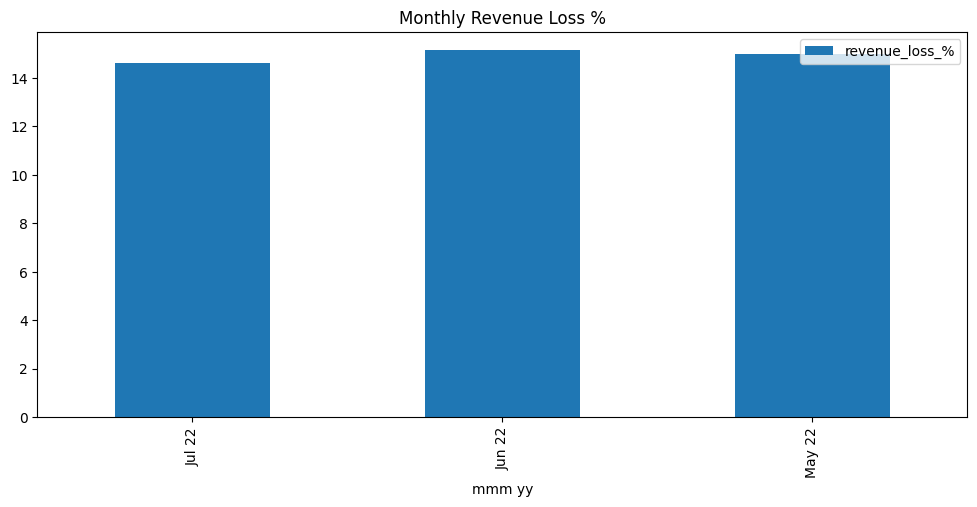

In [12]:
month_loss[['revenue_loss_%']].plot(kind='bar', figsize=(12, 5), title='Monthly Revenue Loss %')


In [13]:
week_loss = df_delhi.groupby('week no')[['revenue_generated', 'revenue_realized']].sum()
week_loss['revenue_loss'] = week_loss['revenue_generated'] - week_loss['revenue_realized']
week_loss['revenue_loss_%'] = (week_loss['revenue_loss'] / week_loss['revenue_generated']) * 100
week_loss.sort_index(inplace=True)
week_loss


,revenue_generated,revenue_realized,revenue_loss,revenue_loss_%
week no,,,,
W 19,28440440,24229352,4211088,14.806691
W 20,26295990,22394022,3901968,14.838643
W 21,24415020,20478528,3936492,16.123239
W 22,26466230,22520162,3946068,14.909823
W 23,24606190,21130816,3475374,14.123983
W 24,28891940,24128006,4763934,16.488799
W 25,26136670,22310302,3826368,14.639845
W 26,25995130,22472380,3522750,13.551577
W 27,27913060,23418598,4494462,16.101646


<Axes: title={'center': 'Weekly Revenue Loss %'}, xlabel='week no'>

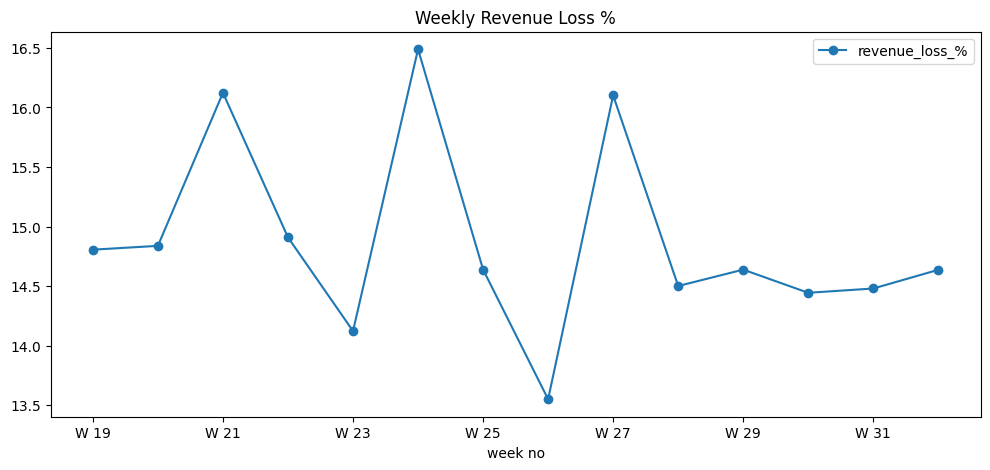

In [14]:
week_loss[['revenue_loss_%']].plot(kind='line', marker='o', figsize=(12, 5), title='Weekly Revenue Loss %')


In [15]:
daytype_loss = df_delhi.groupby('day_type')[['revenue_generated', 'revenue_realized']].sum()
daytype_loss['revenue_loss'] = daytype_loss['revenue_generated'] - daytype_loss['revenue_realized']
daytype_loss['revenue_loss_%'] = (daytype_loss['revenue_loss'] / daytype_loss['revenue_generated']) * 100
daytype_loss


,revenue_generated,revenue_realized,revenue_loss,revenue_loss_%
day_type,,,,
weekeday,232738660,197888656,34850004,14.973878
weekend,99799070,85010618,14788452,14.818226


**"Others"** and **"makeyourtrip"** are driving the highest total RT4 losses,

While journey has the highest % loss — i.e., bookings are generating far less revenue than expected.



Across All Room Categories, “others” Is Underperforming
In every room category (RT1 to RT4), the platform “others” consistently underperforms with a ~15%+ loss margin.

**This implies:**

1) Poor rate realization

2) Possibly bundled with corporate or opaque channels with high discounts

 OTAs like makeyourtrip also leak heavily
Especially in RT3 and RT4, where:
RT4 via makeyourtrip shows ₹577K loss
RT3 via makeyourtrip has a ₹722K loss

 **ROOT CAUSE ANALYSIS: Revenue Leakage in Delhi Hotels**

**1. Platform-Level Leakage**
Observation:
“Others” platform shows maximum total revenue leakage across all room types.

Makeyourtrip and Journey also show high loss %, especially for premium rooms (RT4).

Losses are due to:

Deep discounting

Poor rate realization

Possibly opaque corporate deals or reseller bookings

Root Cause:
Overdependence on third-party OTAs with opaque pricing and high commissions.

Uncontrolled discount stacking on premium inventory.

**2. Property-Level Issues**
Key Properties:
Atliq Palace – Highest cancellations

Atliq Blue – Highest revenue loss percentage

Root Cause:
Poor inventory management or staff performance

Inadequate customer experience (seen in cancellations)

Possibly misaligned pricing-to-perceived-value

**3. Room-Type Performance**
RT4 (Premium Rooms):
Highest per-unit revenue loss

Heavily booked via “others” and makeyourtrip with lower realization

Bookings from Journey had ~25% loss, the highest loss % overall

Root Cause:
Premium rooms sold via heavy-discount platforms

High refund/cancellation ratio

Likely poor customer targeting or mismatched expectations

**4. Month & Week Trends**

Loss spikes in specific months or weeks likely due to:

Unoptimized campaigns

High refund months (e.g., after holidays)

Seasonal overpricing or misaligned demand forecast

**5. Day-Type Pattern**
Higher losses on weekends, especially for RT4 rooms

May indicate leisure travelers canceling more, or weekend-only offers being misused

**Actions:Platform Optimization Strategy**

**1) Deprioritize "others"**- Restrict inventory, break it into sub-platforms to isolate root channels-15–20% revenue lift

**2) Renegotiate OTA Terms**-	Reduce commission for premium inventory (RT4) -	Better margin retention

**3) Boost Direct Online** - Incentivize direct bookings (e.g., loyalty, early check-in) -	Reduces dependency on OTAs

**2. Premium Room (RT4) Revenue Strategy**

**1) Restrict RT4 on OTAs** -	Make RT4 exclusive to direct or select partners -	Maximizes yield

**2) Price Reinforcement** -	Implement minimum price guarantee (MPG) across platforms - Prevents deep discounts

**3) Segment Customers**  -	Offer RT4 to high-lifetime-value guests (loyalty members) -	Reduces cancellations


**3. Property-Specific Operational Fixes**

**Atliq Palace**  -	Deep-dive into high cancellations: refund policy audit, staff/service review

**Atliq Blue**  - Run A/B test pricing adjustments on RT4; check booking channel mix

**4. Cancellation Management**

**1) Stricter Cancellation Policy on Weekends**- Especially for RT4 bookings

**2) Ban on same-day cancellations**- Improve forecast stability

**3) Confirmation Reminders**- Auto-email reminders 1–2 days before stay

**5. Time-Based Inventory Strategy**

**1) Dynamic Price Tuning** - Adjust price sensitivity weekly, not monthly

**2) Flash Sale Guardrails**- Avoid aggressive discounts during low conversion months

**3) Weekday Boosters**- Offer early bird promos for weekday stays